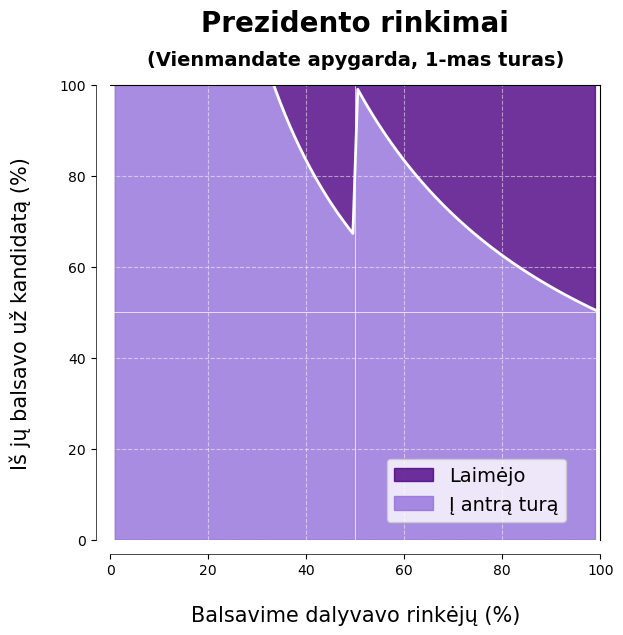

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def prezidento_rinkimai(aktyvumas):
    """
    Visualizes the conditions for electing a president in a single-mandate electoral district.
    The function plots the percentage of votes needed for a candidate to be elected based on voter turnout.

    Parameters:
    - aktyvumas: A tuple indicating the lower and upper limits of voter turnout (%).

    The function follows these rules:
    1) If voter turnout is above 50%, a candidate is elected if they receive more than half 
    of the votes from those who participated.
    2) If voter turnout is 50% or less, a candidate is elected if they receive the most votes, 
    but not less than one-third of all votes cast.

    Returns:
    None. The function generates a plot showing the relationship between voter turnout and the percentage of votes needed to win.
    """

    # Voter turnout rates within the specified range
    dalyvavimo_proc = np.linspace(*aktyvumas, 100)
    
    # Calculate the percentage of votes needed for a candidate to win based on voter turnout
    balsu_proc_prezidento_rinkimai = []
    for rate in dalyvavimo_proc:
        if rate > 0:
            if rate <= 50:
                # For turnouts of 50% or less, a candidate needs at least one-third of the votes
                balsu_proc_prezidento_rinkimai.append((100/3 / rate) * 100)
            else:
                # For turnouts above 50%, a candidate needs more than half of the votes
                balsu_proc_prezidento_rinkimai.append((50 / rate) * 100)
        else:
            # No votes are cast if turnout is 0%
            balsu_proc_prezidento_rinkimai.append(0)

    # Plotting the data
    fig2, ax2 = plt.subplots(figsize=(7, 7))
    ax2.plot(dalyvavimo_proc, balsu_proc_prezidento_rinkimai, color='white', linewidth=2, label='Balsų procentas (%)')
    ax2.set_ylim(0, 100)
    
    # Fill the area under the curve to visualize the votes needed to win
    virsutine_riba = np.full_like(balsu_proc_prezidento_rinkimai, 100)
    ax2.fill_between(dalyvavimo_proc, balsu_proc_prezidento_rinkimai, virsutine_riba, color='indigo', alpha=0.8, label='Nuspalvinta zona')
    ax2.fill_between(dalyvavimo_proc, 0, balsu_proc_prezidento_rinkimai, color='mediumpurple', alpha=0.8, label='Po kreives nuspalvinta zona')
    
    # Set the plot title and labels
    ax2.set_title('Prezidento rinkimai', fontsize=20, ha='center', weight='bold', y=1.1, x=0.50)
    fig2.suptitle('(Vienmandate apygarda, 1-mas turas)', fontsize=14, ha='center', weight='bold', y=0.85, x=0.55) 
    ax2.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax2.set_ylabel('Iš jų balsavo už kandidatą (%)', fontsize=15, labelpad=20)
    
    # Add grid lines and vertical/horizontal lines at 50%
    ax2.grid(which='both', linestyle='--', color='white', alpha=0.5)
    ax2.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax2.axhline(y=50, color='white', linestyle='-', linewidth=0.5)
    
    # Adjust the position and appearance of the axes
    for spine in ['left', 'bottom']:
        ax2.spines[spine].set_position(('data', -3))
        ax2.spines[spine].set_color('k')
        ax2.spines[spine].set_linewidth(0.5)
    
    # Set the x-axis limit
    ax2.set_xlim(0, 100)
    
    # Define colors for the legend
    colors = {'Indigo': 'Laimėjo', 'Mediumpurple': 'Į antrą turą'}
    patches = [Patch(color=color, label=label, alpha=0.8) for color, label in colors.items()]
    
    # Add a legend to the plot
    ax2.legend(handles=patches, loc='upper right', bbox_to_anchor=(0.95, 0.2), fontsize=14)
    
    # Adjust the spacing around the plot
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)
    
    # Display the plot
    plt.show()

# Call the function with the specified voter turnout range
prezidento_rinkimai((1, 99))


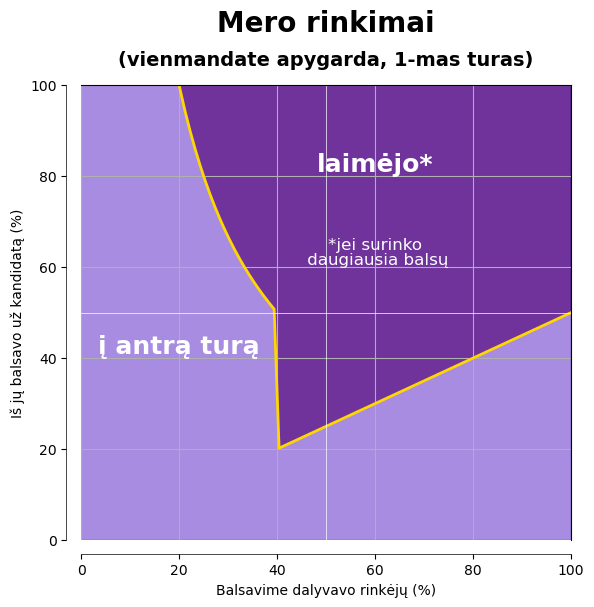

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_election_thresholds():
    """
    Mayoral elections in the single-mandate electoral district:
1) a candidate who received more than half of the votes of the voters who participated 
in the election during the first voting is considered elected, if at least 40 percent of the voters entered in the voter lists of that electoral district participated in the election;
2) if less than 40 percent of the voters entered in the voter lists of that 
electoral district took part in the election, the candidate who received the most, but not less than 1/5 of all the votes of the voters entered in the voter lists of that electoral district, is considered elected
     """
    # Voter turnout rates from 0.001% to 99.999%, avoiding division by zero
    dalyvavimo_proc = np.linspace(0.001, 99.9999, 100)
    balsai = []

    for rate in dalyvavimo_proc:
        if rate >= 40:  # At least 40% participation
            balsai.append(rate * 0.5)
        else:
            balsai.append((20 / rate * 100))

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))

    # Plotting the data
    ax.plot(dalyvavimo_proc, balsai, color='gold', linewidth=2, label='More Than 33.33% Participation')

    # Formatting the axes
    ax.set_xlabel('Balsavime dalyvavo rinkėjų (%)')
    ax.set_ylabel('Iš jų balsavo už kandidatą (%)')
    ax.set_title('Mero rinkimai', fontsize=20, ha='center', weight='bold', y=1.1, x=0.50)
    fig.suptitle('(vienmandate apygarda, 1-mas turas)', fontsize=14, ha='center', weight='bold', y=0.85, x=0.55)
    ax.set_ylim(0, 100)  # Limit y-axis to 0-100%
    ax.set_xlim(0, 100)  # Limit x-axis to 0-100%
    ax.grid(True)

    # Filling areas under the curve
    virsutine_riba = np.full_like(balsai, 100)
    ax.fill_between(dalyvavimo_proc, balsai, virsutine_riba, color='indigo', alpha=0.8, label='Shaded Area')
    ax.fill_between(dalyvavimo_proc, 0, balsai, color='mediumpurple', alpha=0.8, label='Shaded Area Under Curve')

    # Additional formatting
    ax.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax.axhline(y=50, color='white', linestyle='-', linewidth=0.5)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position(('data', -3))
        ax.spines[spine].set_color('k')
        ax.spines[spine].set_linewidth(0.5)

    # Adding text to the plot
    label_text = 'laimėjo*'
    label_x_position = 60
    label_y_position = 80
    ax.text(label_x_position, label_y_position, label_text,
            fontsize=18, ha='center', va='bottom', color='white',
            linespacing=3, weight='bold')

    label_text = '*jei surinko\n daugiausia balsų'
    label_x_position = 60
    label_y_position = 60
    ax.text(label_x_position, label_y_position, label_text,
            fontsize=12, ha='center', va='bottom', color='white',
            linespacing=1)

    label_text2 = 'į antrą turą'
    label_x_position2 = 20
    label_y_position2 = 40
    ax.text(label_x_position2, label_y_position2, label_text2,
            fontsize=18, ha='center', va='bottom', color='white',
            linespacing=3, weight='bold')

    # Adjusting subplot parameters
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)

    # Saving the plot
    plt.savefig('/Users/daivadaugelaite/2_grafikas.png')

    # Displaying the plot
    plt.show()

# Example usage
plot_election_thresholds()


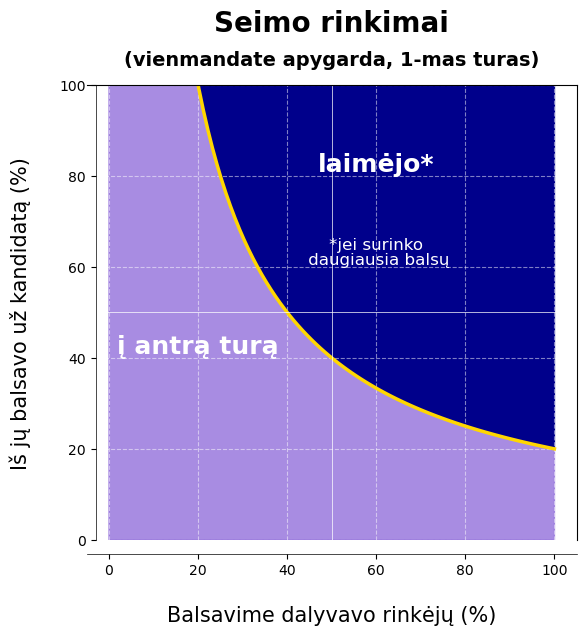

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_sejm_elections():
    """
    In the single-mandate electoral district of the Seimas elections:
the candidate who received the most votes of the voters who participated in the election, 
but not less than 1/5 of all the votes
of the voters entered in the voter lists of that electoral district, is considered elected.  
    """
    # Voter turnout rates from 0.001% to 99.999%, avoiding division by zero
    dalyvavimo_proc = np.linspace(0.001, 99.999, 100)

    # Vote percentage calculation for parliamentary elections
    balsu_proc = 20 / dalyvavimo_proc * 100

    # Figure and axis setup
    fig1, ax1 = plt.subplots(figsize=(7, 7))

    # Setting y-axis limits
    ax1.set_ylim(0, 100)

    # Plotting the data
    ax1.plot(dalyvavimo_proc, balsu_proc, color='gold', linewidth=2.5, label='Votes (%)')

    # Upper limit for shading the graph
    virsutine_riba = np.full_like(balsu_proc, 100)

    # Shading the graph with dark blue
    ax1.fill_between(dalyvavimo_proc, balsu_proc, virsutine_riba, color='darkblue', alpha=1, label='Shaded Area')

    # Shading the area up to 50% participation with mediumpurple
    ax1.fill_between(dalyvavimo_proc[:100], balsu_proc[:100], color='mediumpurple', alpha=0.8, label='Shaded Area')

    # Setting the title and subtitles
    ax1.set_title('Seimo rinkimai', fontsize=20, weight='bold', y=1.1)
    fig1.suptitle('(vienmandate apygarda, 1-mas turas)', fontsize=14, ha='center', weight='bold', y=0.85, x=0.55)

    # Setting labels and grid
    ax1.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax1.set_ylabel('Iš jų balsavo už kandidatą (%)', fontsize=15, labelpad=20)
    ax1.grid(which='both', linestyle='--', color='white', alpha=0.5)
    ax1.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax1.axhline(y=50, color='white', linestyle='-', linewidth=0.5)

    # Spine adjustments
    for spine in ['left', 'bottom']:
        ax1.spines[spine].set_position(('data', -3))
        ax1.spines[spine].set_color('k')
        ax1.spines[spine].set_linewidth(0.5)

    # Text annotations
    label_text = 'laimėjo*'
    label_x_position = 60
    label_y_position = 80
    ax1.text(label_x_position, label_y_position, label_text, fontsize=18, ha='center', va='bottom', color='white', linespacing=3, weight='bold')

    label_text = '*jei surinko\n daugiausia balsų'
    label_x_position = 60
    label_y_position = 60
    ax1.text(label_x_position, label_y_position, label_text, fontsize=12, ha='center', va='bottom', color='white', linespacing=1)

    label_text2 = 'į antrą turą'
    label_x_position2 = 20
    label_y_position2 = 40
    ax1.text(label_x_position2, label_y_position2, label_text2, fontsize=18, ha='center', va='bottom', color='white', linespacing=3, weight='bold')

    # Adjusting subplot parameters
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)

    # Displaying the plot
    plt.show()

# Example usage
plot_sejm_elections()


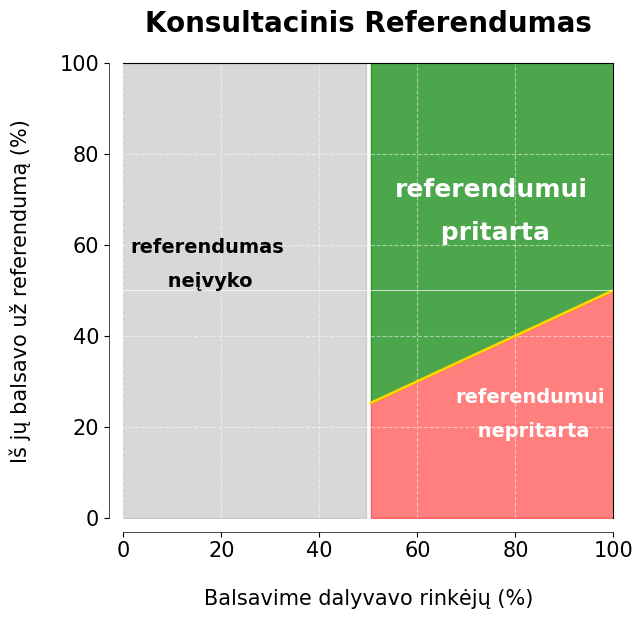

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_referendum_votes():

    """
    In the event that more than half of the citizens participated in the consultative (advisory) referendum and at least half of the citizens 
    who participated in it approved the adoption of a specific decision, the decision is considered adopted.
  
    """
 
    # Voter turnout rates from 0.001% to 99.999%, avoiding division by zero
    dalyvavimo_proc = np.linspace(0.001, 99.999, 100)

    # Vote percentage calculation based on participation rate
    balsai = np.where(dalyvavimo_proc <= 100/2, 0, 0.5 * dalyvavimo_proc)

    # Filtering data for participation > 33.33%
    fil_duom = dalyvavimo_proc > 100/2

    # Figure and axis setup
    fig, ax = plt.subplots(figsize=(7, 7))

    # Plotting the data
    ax.plot(dalyvavimo_proc[fil_duom], balsai[fil_duom], color='gold', linewidth=2, label='More Than 33.33% Participation')

    # Upper limit for shading the graph
    virsutine_riba = np.where(dalyvavimo_proc > 100/2, 100, np.nan)

    # Shading the graph based on conditions
    ax.fill_between(dalyvavimo_proc, balsai, virsutine_riba, where=~np.isnan(virsutine_riba), color='green', alpha=0.7, label='Shaded Area')
    ax.fill_between(dalyvavimo_proc, balsai, where=(dalyvavimo_proc > 100/2), color='red', alpha=0.5, label='Shaded Area')
    ax.fill_between(dalyvavimo_proc, balsai, 100, where=(dalyvavimo_proc <= 100/2), color='grey', alpha=0.3, label='Filled Area')

    # Annotations
    label_text = 'referendumui\n pritarta'
    label_x_position = 75  
    label_y_position = 60  
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=18, ha='center', va='bottom', color='white',
             linespacing=2, weight='bold')  

    label_text = 'referendumas\n neįvyko'
    label_x_position = 17  
    label_y_position = 50  
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=14, ha='center', va='bottom', color='black',
             linespacing=2, weight='bold') 

    label_text = 'referendumui\n nepritarta'
    label_x_position = 83  
    label_y_position = 17  
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=14, ha='center', va='bottom', color='white',
             linespacing=2, weight='bold')  

    # Axis settings
    ax.set_title('Konsultacinis Referendumas', fontsize=20, weight='bold', y=1.05)
    ax.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax.set_ylabel('Iš jų balsavo už referendumą (%)', fontsize=15, labelpad=20)
    ax.grid(which='both', linestyle='--', color='white', alpha=0.5)
    ax.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax.axhline(y=50, color='white', linestyle='-', linewidth=0.5)

    # Spine adjustments
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position(('data', -3))  
        ax.spines[spine].set_color('k')  
        ax.spines[spine].set_linewidth(0.5)  

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Axis limits
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # Subplot adjustment
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)

    # Displaying the plot
    plt.show()

# Example usage
plot_referendum_votes()


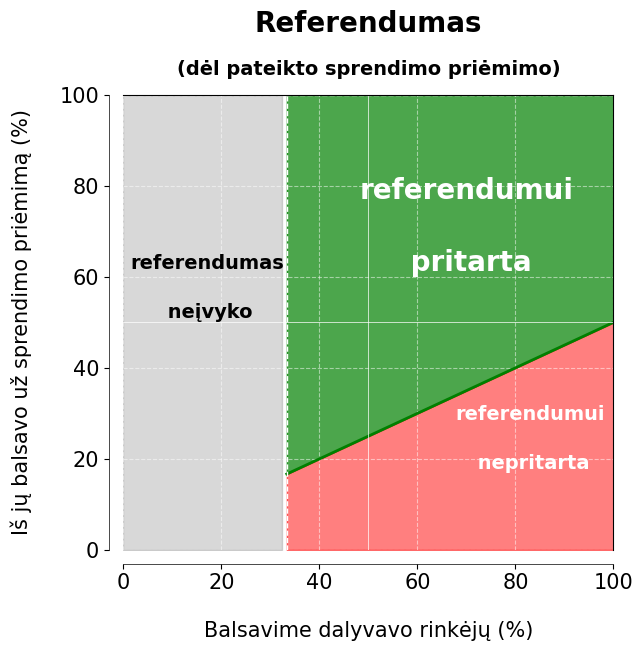

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_referendum_votes():
    # Voter turnout rates from 0.001% to 99.999%, avoiding division by zero
    dalyvavimo_proc = np.linspace(0.001, 99.999, 100)

    # Vote percentage calculation based on participation rate
    balsai = np.where(dalyvavimo_proc <= 100/3, 0, 0.5 * dalyvavimo_proc)

    # Filtering data for participation > 33.33%
    filtered_data = dalyvavimo_proc > 100/3

    # Figure and axis setup
    fig, ax = plt.subplots(figsize=(7, 7))

    # Plotting the data
    ax.plot(dalyvavimo_proc[filtered_data], balsai[filtered_data], color='green', linewidth=2, label='More Than 33.33% Participation')

    # Specific dashed lines
    specific_x = 100/3  
    specific_y = 100
    ax.plot([specific_x, specific_x], [0, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')
    ax.plot([0, 100], [specific_y, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')

    # Upper limit for shading the graph
    virsutine_riba = np.where(dalyvavimo_proc > 100/3, 100, np.nan)

    # Shading the graph based on conditions
    ax.fill_between(dalyvavimo_proc, balsai, virsutine_riba, where=~np.isnan(virsutine_riba), color='green', alpha=0.7, label='Shaded Area')
    ax.fill_between(dalyvavimo_proc, balsai, where=(dalyvavimo_proc > 100/3), color='red', alpha=0.5, label='Shaded Area')
    ax.fill_between(dalyvavimo_proc, balsai, 100, where=(dalyvavimo_proc <= 100/3), color='grey', alpha=0.3, label='Filled Area')

    # Annotations
    label_text = 'referendumui\n pritarta'
    label_x_position = 70  
    label_y_position = 60  
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=20, ha='center', va='bottom', color='white',
             linespacing=3, weight='bold')  

    label_text = 'referendumas\n neįvyko'
    label_x_position = 17  
    label_y_position = 50 
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=14, ha='center', va='bottom', color='black',
             linespacing=3, weight='bold')  

    label_text = 'referendumui\n nepritarta'
    label_x_position = 83  
    label_y_position = 17  
    ax.text(label_x_position, label_y_position, label_text,
             fontsize=14, ha='center', va='bottom', color='white',
             linespacing=3, weight='bold')  

    # Axis settings
    ax.set_title('Referendumas', fontsize=20, weight='bold', y=1.12)
    fig.suptitle('(dėl pateikto sprendimo priėmimo)', fontsize=14, weight='bold', y=0.85, x=0.55)
    ax.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax.set_ylabel('Iš jų balsavo už sprendimo priėmimą (%)', fontsize=15, labelpad=20)
    ax.grid(which='both', linestyle='--', color='white', alpha=0.5)
    ax.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax.axhline(y=50, color='white', linestyle='-', linewidth=0.5)

    # Spine adjustments
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position(('data', -3))  
        ax.spines[spine].set_color('k')  
        ax.spines[spine].set_linewidth(0.5)  

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Axis limits
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # Subplot adjustment
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)

    # Displaying the plot
    plt.show()

# Example usage
plot_referendum_votes()


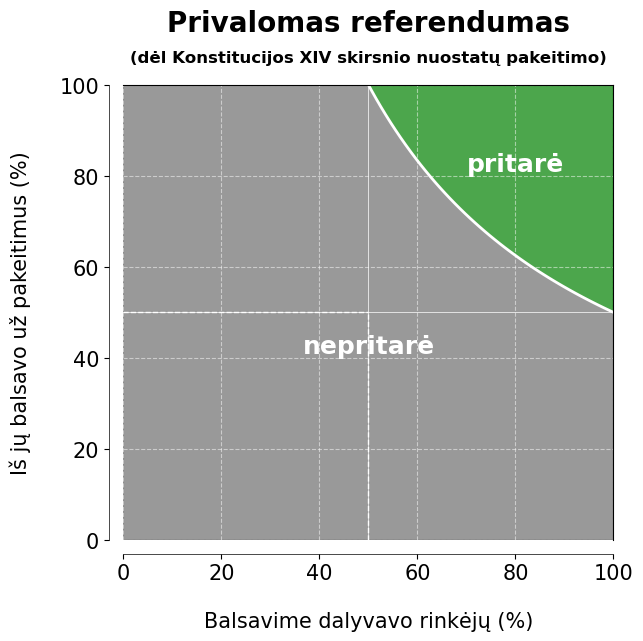

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_referendum_voting():
    
    """
    The decision on the amendment of the provisions of Section I "State of Lithuania" and Section XIV "Amendment of the Constitution" of the Constitution of the Republic of Lithuania is considered adopted 
    if it was approved by more than half of the citizens who have the right to vote and are entered in 
    the voter lists
    """
    # Voter turnout rates from 0.001% to 99.999%, avoiding division by zero
    dalyvavimo_proc = np.linspace(0.001, 99.999, 100)

    # Vote percentage calculation based on participation rate
    balsu_proc = 50 / dalyvavimo_proc * 100

    # Figure and axis setup
    fig1, ax1 = plt.subplots(figsize=(7, 7))
    ax1.set_ylim(0, 100)

    # Specific dashed lines
    specific_x = 50
    specific_y = 50
    ax1.plot([specific_x, specific_x], [0, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')
    ax1.plot([0, 50], [specific_y, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')

    # Plotting the data
    ax1.plot(dalyvavimo_proc, balsu_proc, color='white', linewidth=2, label='Votes (%)')

    # Upper limit for shading the graph
    virsutine_riba = np.full_like(balsu_proc, 100)

    # Shading the graph based on conditions
    ax1.fill_between(dalyvavimo_proc, balsu_proc, virsutine_riba, color='green', alpha=0.7, label='Shaded Area')
    ax1.fill_between(dalyvavimo_proc[:100], balsu_proc[:100], color='grey', alpha=0.8, label='Shaded Area')

    # Axis settings
    ax1.set_title('Privalomas referendumas', fontsize=20, weight='bold', y=1.1)
    fig1.suptitle('(dėl Konstitucijos XIV skirsnio nuostatų pakeitimo)', fontsize=12, weight='bold', y=0.85, x=0.55)
    ax1.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax1.set_ylabel('Iš jų balsavo už pakeitimus (%)', fontsize=15, labelpad=20)
    ax1.grid(which='both', linestyle='--', color='white', alpha=0.5)
    ax1.axvline(x=50, color='white', linestyle='-', linewidth=0.5)
    ax1.axhline(y=50, color='white', linestyle='-', linewidth=0.5)

    # Spine adjustments
    for spine in ['left', 'bottom']:
        ax1.spines[spine].set_position(('data', -3))  
        ax1.spines[spine].set_color('k')  
        ax1.spines[spine].set_linewidth(0.5)  

    # Tick parameters
    ax1.tick_params(axis='both', which='major', labelsize=15)

    # Text annotations
    label_text = 'pritarė'
    label_x_position = 80  
    label_y_position = 80  
    ax1.text(label_x_position, label_y_position, label_text,
             fontsize=18, ha='center', va='bottom', color='white',
             linespacing=3, weight='bold')  

    label_text2 = 'nepritarė'
    label_x_position2 = 50  
    label_y_position2 = 40  
    ax1.text(label_x_position2, label_y_position2, label_text2,
             fontsize=18, ha='center', va='bottom', color='white',
             linespacing=3, weight='bold')  

    # Axis limits
    ax1.set_xlim(0, 100)

    # Subplot adjustment and saving the figure
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)
    fig1.savefig("/Users/daivadaugelaite/6_grafikas.png")

    # Displaying the plot
    plt.show()

# Example usage
plot_referendum_voting()


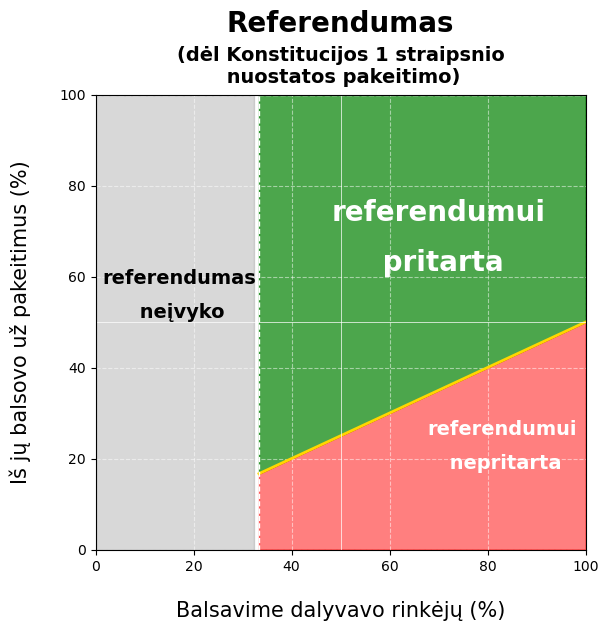

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_referendum_results(participation_rate):
    """
    Plots the referendum results based on participation rates.

    is considered adopted if it was approved by more than half of the citizens who participated in the referendum,
    but not less than 1/3 of the citizens who have the right to vote and are entered in the voter lists.
    """
    # Calculate voting percentages based on participation rates
    balsai = np.where(participation_rate <= 100/3, 0, 0.5 * participation_rate)

    # Determine which data points correspond to participation rates greater than 33.33%
    fil_duom = participation_rate > 100/3

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(7, 7))

    # Plot the line representing data points with participation rates greater than 33.33%
    ax.plot(participation_rate[fil_duom], balsai[fil_duom], color='gold', linewidth=2, label='More Than 33.33% Participation')

    # Add dashed lines for specific conditions
    specific_x = 100/3  
    specific_y = 100
    ax.plot([specific_x, specific_x], [0, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')
    ax.plot([0, 100], [specific_y, specific_y], color='white', linewidth=1, linestyle='dashed', label='Specific Condition')

    # Fill areas based on participation rates
    virsutine_riba = np.where(participation_rate > 100/3, 100, np.nan)
    ax.fill_between(participation_rate, balsai, virsutine_riba, where=~np.isnan(virsutine_riba), color='green', alpha=0.7, label='Shaded Area')
    ax.fill_between(participation_rate, balsai, where=(participation_rate > 100/3), color='red', alpha=0.5, label='Shaded Area')
    ax.fill_between(participation_rate, balsai, 100, where=(participation_rate <= 100/3), color='grey', alpha=0.3, label='Filled Area')

    # Add text labels
    texts = [
        ('referendumui\n pritarta', 70, 60),
        ('referendumas\n neįvyko', 17, 50),
        ('referendumui\n nepritarta', 83, 17)
    ]
    for text, x_pos, y_pos in texts:
        ax.text(x_pos, y_pos, text, fontsize=20 if text == 'referendumui\n pritarta' else 14, ha='center', va='bottom', color='white' if text == 'referendumui\n pritarta' or text == 'referendumui\n nepritarta' else 'black', linespacing=2, weight='bold')

    # Set title, labels, grid, and axes limits
    ax.set_title('Referendumas', fontsize=20, weight='bold', y=1.12)
    fig.suptitle('(dėl Konstitucijos 1 straipsnio\n nuostatos pakeitimo)', fontsize=14, weight='bold', y=0.87, x=0.55)
    ax.set_xlabel('Balsavime dalyvavo rinkėjų (%)', fontsize=15, labelpad=20)
    ax.set_ylabel('Iš jų balsovo už pakeitimus (%)', fontsize=15, labelpad=20)
    ax.grid(which='both', linestyle='--', color='white', alpha=0.5) 
    ax.axvline(x=50, color='white', linestyle='-', linewidth=0.5)  
    ax.axhline(y=50, color='white', linestyle='-', linewidth=0.5)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # Adjust subplot parameters
    plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=0.8, wspace=0.5, hspace=0.05)

    # Show the plot
    plt.show()

# Example usage
if __name__ == "__main__":
    dalyvavimo_proc = np.linspace(0.001, 99.999, 100)
    plot_referendum_results(dalyvavimo_proc)
